In [ ]:
!pip install numpy pandas matplotlib seaborn scipy statsmodels

In [3]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

In [5]:
df = pd.read_csv('/content/drive/MyDrive/nirf_engg_ranking_india_2020.csv')

In [6]:
df.head()

,institute_id,name,link,tlr,rpc,go,oi,perception,city,state,score,rank
0,IR-E-U-0456,Indian Institute of Technology Madras,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,95.42,94.64,83.90,61.31,100.00,Chennai,Tamil Nadu,89.93,1
1,IR-E-I-1074,Indian Institute of Technology Delhi,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,90.79,96.15,80.36,64.81,94.46,New Delhi,Delhi,88.08,2
2,IR-E-U-0306,Indian Institute of Technology Bombay,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,91.00,93.37,77.60,49.99,92.51,Mumbai,Maharashtra,85.08,3
3,IR-E-I-1075,Indian Institute of Technology Kanpur,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,86.22,82.08,88.44,54.21,85.78,Kanpur,Uttar Pradesh,82.18,4
4,IR-E-U-0573,Indian Institute of Technology Kharagpur,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,77.32,87.11,83.21,56.62,89.31,Kharagpur,West Bengal,80.56,5


**Data Columns**<br>
tlr - teaching,learning & resources<br>
rpc - research, professional practice and collaborative performance<br>
go - graduation outcome<br>
oi - outreach and inclusivity<br>
perception - academic peer and employers perception<br>
score - overall score obtained by the college<br>
link - link to the full report of the college<br>
rank - final rank obtained by the college based on the score<br>
institute_id - unique id provided by nirf india<br>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   institute_id  200 non-null    object 
 1   name          200 non-null    object 
 2   link          200 non-null    object 
 3   tlr           200 non-null    float64
 4   rpc           200 non-null    float64
 5   go            200 non-null    float64
 6   oi            200 non-null    float64
 7   perception    200 non-null    float64
 8   city          200 non-null    object 
 9   state         200 non-null    object 
 10  score         200 non-null    float64
 11  rank          200 non-null    int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 18.9+ KB




---



**Measures of Central Tendency**

Mean of every numeric column(ratio type data) present in the dataset

In [8]:
colMeans = df.drop('rank',axis=1).mean(axis=0, numeric_only=True)
print(colMeans)

tlr           59.05015
rpc           20.30735
go            56.70360
oi            51.87370
perception    14.21465
score         41.75835
dtype: float64


Median of every numeric column(ratio type data) present in the dataset

In [9]:
colMedians = df.drop('rank', axis=1).median(axis=0, numeric_only=True)
print(colMedians)

tlr           57.525
rpc           13.350
go            55.070
oi            51.855
perception     6.650
score         37.560
dtype: float64


Mode of the column 'state' present in the dataset

In [16]:
print(df['state'].mode())
print('Frequency: ', df['state'].value_counts().max())

0    Tamil Nadu
dtype: object
Frequency:  35


This shows that the state Tamil Nadu has the highest number of Engineering Colleges(i.e., 35) among the top 200 Engineering Colleges of India.



---



**Distribution Type**

Using visualization methods and ks-test<br>

H0: Follows a normal distribution<br>
H1: Doesn't follow a normal distribution

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


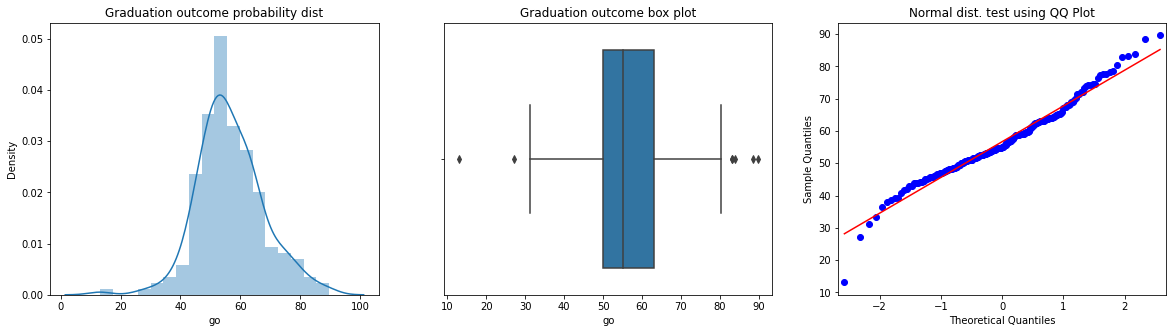

In [17]:
fig, a = plt.subplots(1, 3, figsize = (20, 5))

sns.distplot(df['go'], hist=True, kde=True, ax=a[0])
a[0].set_title('Graduation outcome probability dist')

sns.boxplot(x=df['go'], ax=a[1])
a[1].set_title('Graduation outcome box plot')

qqplot(df['go'], line='s', ax=a[2])
a[2].set_title('Normal dist. test using QQ Plot')

plt.show()

In [19]:
from scipy import stats

stats.kstest(df['go'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

'Graduation Outcome'(go) is slightly right skewed and p-value is less than 0.05 which rejects the null hypothesis hence is not normal.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


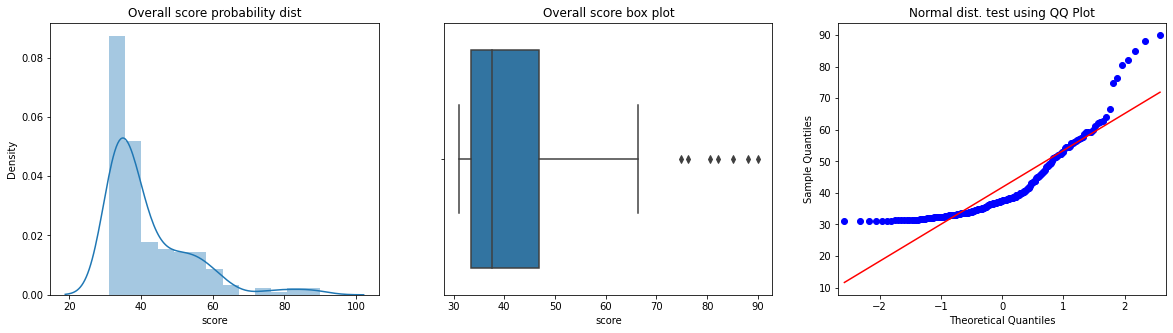

In [18]:
fig, a = plt.subplots(1, 3, figsize = (20, 5))

sns.distplot(df['score'], hist=True, kde=True, ax=a[0])
a[0].set_title('Overall score probability dist')

sns.boxplot(x=df['score'], ax=a[1])
a[1].set_title('Overall score box plot')

qqplot(df['score'], line='s', ax=a[2])
a[2].set_title('Normal dist. test using QQ Plot')

plt.show()

In [20]:
stats.kstest(df['score'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

'Overall Score'(score) is also right skewed and p-values is less than 0.05, which rejects the null hypothesis hence it is not normal

An observation which can be made from the right skewedness of the two columns - 'Graduation Outcome'(go) and 'Overall Score'(score) indicates that both the measures for the Colleges are mostly greater than 50% which should be the reason why these Colleges are ranked among top 200 in the country.



---



**Hypothesis Testing**<br>

To check if there exists a relation between  using 2 tailed t-test<br>
H0 - They are not related<br>
H1 - Maybe they are related<br>

In [23]:
stats.ttest_ind(a=df['go'], b=df['perception'])

Ttest_indResult(statistic=27.026289048972977, pvalue=4.2717842222013554e-92)

The above result indicates the null hypothesis is rejected and there could be a relation between the two. 

In [24]:
df['go'].cov(df['perception'])

143.45020126633182

In [25]:
df['go'].corr(df['perception'])

0.6707378141204976

The high covariance and positive correlation values strengthens the relationship between the two.

In [31]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = df['go'].values.reshape(-1,1)
y = df['perception'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LinearRegression().fit(X_train, y_train)
print('Linear Regression\n')
print('R2 score: ', model.score(X_test, y_test))
y_pred = model.predict(X_test)

Linear Regression

R2 score:  0.6211967224787365


The r2 score shows that there is a relation between the two but might not be a linear relation.